# Unit 5 - Financial Planning

In [5]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# The average household income for each member of the credit union is $12,000.
# Every union member has a savings portfolio composed of cryptocurrencies, stocks and bonds:
#Assume the following amount of crypto assets: 1.2 BTC and 5.3 ETH.
#Assume the following amount of shares in stocks and bonds: 50 SPY (stocks) and 200 AGG (bonds).

In [7]:
# Set current amount of crypto assets
crypto_assets = {"coins": [1.2, 5.3]}

# Set the tickers
coins = ['BTC', 'ETH']

# Create the shares DataFrame
coin_shares = pd.DataFrame(crypto_assets, index=coins)

# Display shares data
coin_shares

,coins
BTC,1.2
ETH,5.3


In [8]:
# Reorganize the DataFrame # Separate coin data and concatenate 
btc_shares =coin_shares.loc["BTC"]["coins"]
eth_shares =coin_shares.loc["ETH"]["coins"]
btc_shares

1.2

In [9]:
eth_shares

5.3

In [10]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
btc_url

'https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD'

In [11]:
# Execute get request, get content and read as json 
response_data_btc = requests.get(btc_url)
response_data_eth = requests.get(eth_url)
response_data_btc.content
response_data_eth.content
btc_data = response_data_btc.json()
eth_data = response_data_eth.json()

# Display the results
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19558243,
   'total_supply': 19558243,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 38689.0,
     'volume_24h': 21846232469,
     'market_cap': 757026994037,
     'percentage_change_1h': -0.244255815816636,
     'percentage_change_24h': 2.57804847612662,
     'percentage_change_7d': 2.61025176173496,
     'percent_change_1h': -0.244255815816636,
     'percent_change_24h': 2.57804847612662,
     'percent_change_7d': 2.61025176173496}},
   'last_updated': 1701458067}},
 'metadata': {'timestamp': 1701458067,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [12]:
# Display the results
eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120237836,
   'total_supply': 120237836,
   'max_supply': 120237836,
   'quotes': {'USD': {'price': 2090.06,
     'volume_24h': 19938588522,
     'market_cap': 251159556220,
     'percentage_change_1h': -0.134952082401843,
     'percentage_change_24h': 2.61055974760414,
     'percentage_change_7d': -0.160343680901418,
     'percent_change_1h': -0.134952082401843,
     'percent_change_24h': 2.61055974760414,
     'percent_change_7d': -0.160343680901418}},
   'last_updated': 1701458066}},
 'metadata': {'timestamp': 1701458066,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [13]:
# Use JSON dumps to read better given data and output data 
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19558243,
            "total_supply": 19558243,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 38689.0,
                    "volume_24h": 21846232469,
                    "market_cap": 757026994037,
                    "percentage_change_1h": -0.244255815816636,
                    "percentage_change_24h": 2.57804847612662,
                    "percentage_change_7d": 2.61025176173496,
                    "percent_change_1h": -0.244255815816636,
                    "percent_change_24h": 2.57804847612662,
                    "percent_change_7d": 2.61025176173496
                }
            },
            "last_updated": 1701458067
        }
    },
    "metadata": {
        "timestamp": 1701458067,
        "num_crypt

In [14]:
# Find location of btc/usd price data in the dictionary 
btc_current_price = btc_data['data']['1']['quotes']['USD']['price']
btc_symbol = btc_data['data']['1']['symbol']
btc_current_price

38689.0

In [15]:
# Use JSON dumps to read better given data an d output data, display the result
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120237836,
            "total_supply": 120237836,
            "max_supply": 120237836,
            "quotes": {
                "USD": {
                    "price": 2090.06,
                    "volume_24h": 19938588522,
                    "market_cap": 251159556220,
                    "percentage_change_1h": -0.134952082401843,
                    "percentage_change_24h": 2.61055974760414,
                    "percentage_change_7d": -0.160343680901418,
                    "percent_change_1h": -0.134952082401843,
                    "percent_change_24h": 2.61055974760414,
                    "percent_change_7d": -0.160343680901418
                }
            },
            "last_updated": 1701458066
        }
    },
    "metadata": {
        "timestamp": 1701458066,
   

In [16]:
# Find location of eth/usd price data in the dictionary, display the result
eth_current_price = eth_data['data']['1027']['quotes']['USD']['price']
eth_symbol = eth_data['data']['1027']['symbol']
eth_current_price

2090.06

In [17]:
# Fetch current BTC price
btc_current_price

# Fetch current ETH price
eth_current_price

# Compute current value of my crpto
bitcoin_value = btc_shares * btc_current_price
ethereum_value = eth_shares * eth_current_price
crypto_value = bitcoin_value + ethereum_value

# Print current crypto wallet balance
print(f"The current value of your {btc_shares} BTC is ${bitcoin_value:0.2f}")
print(f"The current value of your {eth_shares} ETH is ${ethereum_value:0.2f}")

The current value of your 1.2 BTC is $46426.80
The current value of your 5.3 ETH is $11077.32


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [18]:
# Load .env enviroment variables. It's stored on desktop, outside of repository
load_dotenv("../../api_keys.env")

True

In [19]:
# Set names for an alpaca api key and secret and get the keys from environment file
alpaca_key = os.getenv('alpaca_api_key')
alpaca_secret = os.getenv('alpaca_secret_key')

# Print and verify that keys were loaded correctly 
print(f'Alpaca key type: {type(alpaca_key)}')
print(f'Alpaca key type: {type(alpaca_secret)}')

Alpaca key type: <class 'str'>
Alpaca key type: <class 'str'>


In [20]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [21]:
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_key, 
                       alpaca_secret, 
                       api_version='2')

In [22]:
# Format current date as ISO format
today = pd.Timestamp('2023-11-28', tz='America/New_York').isoformat()
today

'2023-11-28T00:00:00-05:00'

In [23]:
# Set the tickers
tickers = ["SPY", "AGG"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
share_value = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
share_value

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-11-28 05:00:00+00:00,96.11,96.13,95.565,33439,95.61,9749395,95.944402,AGG
2023-11-28 05:00:00+00:00,454.93,456.27,453.500,461132,454.08,62115013,454.721790,SPY


In [24]:
# Reorganize the DataFrame
# Separate ticker data
agg_close_price = share_value[share_value['symbol'] == 'AGG'].drop('symbol', axis=1)
spy_close_price = share_value[share_value['symbol'] == 'SPY'].drop('symbol', axis=1)

In [25]:
# Concatenate the ticker DataFrames
share_value = pd.concat([agg_close_price, spy_close_price],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
share_value

AGG                                             \
                           close   high     low trade_count   open   volume   
timestamp                                                                     
2023-11-28 05:00:00+00:00  96.11  96.13  95.565       33439  95.61  9749395   

                                         SPY                             \
                                vwap   close    high    low trade_count   
timestamp                                                                 
2023-11-28 05:00:00+00:00  95.944402  454.93  456.27  453.5      461132   

                                                        
                             open    volume       vwap  
timestamp                                               
2023-11-28 05:00:00+00:00  454.08  62115013  454.72179

In [26]:
# Pick AGG and SPY close prices
# Fetch the current closing prices from the DataFrame
spy_close_price = float(share_value["SPY"]["close"].iloc[0])
agg_close_price = float(share_value["AGG"]["close"].iloc[0])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $96.11
Current SPY closing price: $454.93


In [27]:
# Compute the current value of shares
spy_value = agg_close_price * my_agg
agg_value = spy_close_price * my_spy
stock_value = spy_value + agg_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $19222.00
The current value of your 200 AGG shares is $22746.50


In [28]:
print(f"The current value of your crypto is ${crypto_value:0.2f}")
print(f"The current value of your stocks is ${stock_value:0.2f}")

The current value of your crypto is $57504.12
The current value of your stocks is $41968.50


### Savings Health Analysis

In [29]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_savings =  {'amount': [crypto_value, stock_value]}

amount = ['crypto', 'shares']

# Create savings DataFrame
savings = pd.DataFrame(total_savings, index=amount)

# Display savings DataFrame
savings

,amount
crypto,57504.118
shares,41968.500


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

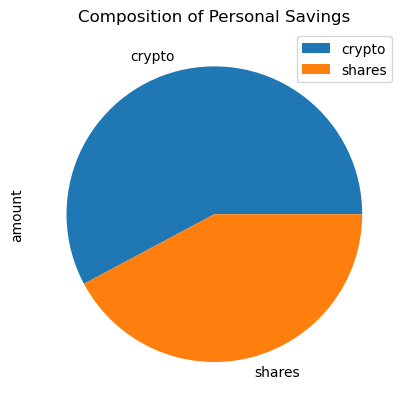

In [30]:
# Plot savings pie chart
# Create a pie chart to show the proportion of saving in the portfolio
savings.plot.pie(y="amount", 
                 title="Composition of Personal Savings")

In [31]:
# Set ideal emergency fund
emergency_fund = monthly_income * 6
emergency_fund

72000

In [32]:
# Calculate total amount of savings
total_savings = crypto_value + stock_value
print(f"The current portfolio value is ${total_savings:0.2f}")

The current portfolio value is $99472.62


In [33]:
# Validate saving health
#if the current savings are enough for an emergency fund. An ideal emergency fund should be equal to three times your monthly income.

#If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.

#If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.

#If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.

#print(f'Congratulations! You have enough money in your emergency fund."
if emergency_fund < total_savings:
    print(f'Congratulations on exceeding the required amount in this fund!')
elif emergency_fund == total_savings:
    print(f'Congratulations for matching required amount in this fund')
elif emergency_fund > total_savings:
    print(f'You have less money in this fund, you need extra ${emergency_fund - total_savings} to reach you goal')
    
    

Congratulations on exceeding the required amount in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [34]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-11-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-11-28', tz='America/New_York').isoformat()

In [38]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers
tickers = ["SPY", "AGG"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
stock_data

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2018-11-28 05:00:00+00:00,104.86,104.9100,104.5700,16990,104.6300,8857283,104.761118,AGG
2018-11-29 05:00:00+00:00,104.91,104.9900,104.8400,18266,104.9200,6039512,104.911142,AGG
2018-11-30 05:00:00+00:00,104.88,104.9600,104.8200,20661,104.9300,6012326,104.871942,AGG
2018-12-03 05:00:00+00:00,104.80,104.8600,104.6300,23611,104.6900,14320801,104.768468,AGG
2018-12-04 05:00:00+00:00,105.08,105.2799,104.9400,14725,104.9800,5971915,105.085107,AGG
...,...,...,...,...,...,...,...,...
2023-11-21 05:00:00+00:00,453.27,454.1310,451.9599,405391,453.1842,49244640,453.027437,SPY
2023-11-22 05:00:00+00:00,455.02,456.3800,453.8895,479664,454.9800,59446575,455.033580,SPY
2023-11-24 05:00:00+00:00,455.30,455.5000,454.7300,190770,455.0700,29737377,455.096500,SPY


In [41]:
# Reorganize the DataFrame
# Separate ticker data
SPY = stock_data[stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = stock_data[stock_data['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
stock_data = pd.concat([AGG, SPY], axis=1, keys=["SPY", "AGG"])
stock_data.index = stock_data.index.date

In [42]:
# Display sample data
stock_data

SPY                                                   \
             close      high      low trade_count    open    volume   
2018-11-28  104.86  104.9100  104.570       16990  104.63   8857283   
2018-11-29  104.91  104.9900  104.840       18266  104.92   6039512   
2018-11-30  104.88  104.9600  104.820       20661  104.93   6012326   
2018-12-03  104.80  104.8600  104.630       23611  104.69  14320801   
2018-12-04  105.08  105.2799  104.940       14725  104.98   5971915   
...            ...       ...      ...         ...     ...       ...   
2023-11-21   95.50   95.5699   95.280       25065   95.45   7393840   
2023-11-22   95.59   95.7500   95.370       21895   95.68   6329863   
2023-11-24   95.15   95.3158   95.120       12820   95.24   2944257   
2023-11-27   95.69   95.7200   95.330       28559   95.36   8854641   
2023-11-28   96.11   96.1300   95.565       33439   95.61   9749395   

                            AGG                                            \
                  vwap    close      high       low trade_count      open   
2018-11-28  104.761118  274.360  274.5800  268.3272      550874  269.6000   
2018-11-29  104.911142  273.950  275.5500  272.4300      393270  273.7100   
2018-11-30  104.871942  275.685  276.2800  273.4500      340106  273.8100   
2018-12-03  104.768468  279.260  280.4000  277.5050      473013  280.2800   
2018-12-04  105.085107  270.390  278.8500  269.9000      864734  278.3700   
...                ...      ...       ...       ...         ...       ...   
2023-11-21   95.451325  453.270  454.1310  451.9599      405391  453.1842   
2023-11-22   95.517140  455.020  456.3800  453.8895      479664  454.9800   
2023-11-24   95.184871  455.300  455.5000  454.7300      190770  455.0700   
2023-11-27   95.570536  454.480  455.4901  454.0799      400700  454.6500   
2023-11-28   95.944402  454.930  456.2700  453.5000      461132  454.0800   

                                   
               volume        vwap  
2018-11-28  129875459  272.085064  
2018-11-29   83664985  273.949833  
2018-11-30  100386880  275.091490  
2018-12-03  104690284  278.951299  
2018-12-04  182203555  272.918990  
...               ...         ...  
2023-11-21   49244640  453.027437  
2023-11-22   59446575  455.033580  
2023-11-24   29737377  455.096500  
2023-11-27   50505987  454.828885  
2023-11-28   62115013  454.721790  

[1258 rows x 14 columns]

In [43]:
num_sims = 500

# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years = MCSimulation(
    portfolio_data = stock_data,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252*30
)
MC_30years

In [44]:
MC_30years.portfolio_data.dropna()

SPY                                                   \
             close      high      low trade_count    open    volume   
2018-11-29  104.91  104.9900  104.840       18266  104.92   6039512   
2018-11-30  104.88  104.9600  104.820       20661  104.93   6012326   
2018-12-03  104.80  104.8600  104.630       23611  104.69  14320801   
2018-12-04  105.08  105.2799  104.940       14725  104.98   5971915   
2018-12-06  105.34  105.5400  105.280       19148  105.29   7665752   
...            ...       ...      ...         ...     ...       ...   
2023-11-21   95.50   95.5699   95.280       25065   95.45   7393840   
2023-11-22   95.59   95.7500   95.370       21895   95.68   6329863   
2023-11-24   95.15   95.3158   95.120       12820   95.24   2944257   
2023-11-27   95.69   95.7200   95.330       28559   95.36   8854641   
2023-11-28   96.11   96.1300   95.565       33439   95.61   9749395   

                                         AGG                                  \
                  vwap daily_return    close      high       low trade_count   
2018-11-29  104.911142     0.000477  273.950  275.5500  272.4300      393270   
2018-11-30  104.871942    -0.000286  275.685  276.2800  273.4500      340106   
2018-12-03  104.768468    -0.000763  279.260  280.4000  277.5050      473013   
2018-12-04  105.085107     0.002672  270.390  278.8500  269.9000      864734   
2018-12-06  105.374036     0.002474  269.770  269.9700  262.4400     1061720   
...                ...          ...      ...       ...       ...         ...   
2023-11-21   95.451325     0.001048  453.270  454.1310  451.9599      405391   
2023-11-22   95.517140     0.000942  455.020  456.3800  453.8895      479664   
2023-11-24   95.184871    -0.004603  455.300  455.5000  454.7300      190770   
2023-11-27   95.570536     0.005675  454.480  455.4901  454.0799      400700   
2023-11-28   95.944402     0.004389  454.930  456.2700  453.5000      461132   

                                                          
                open     volume        vwap daily_return  
2018-11-29  273.7100   83664985  273.949833    -0.001494  
2018-11-30  273.8100  100386880  275.091490     0.006333  
2018-12-03  280.2800  104690284  278.951299     0.012968  
2018-12-04  278.3700  182203555  272.918990    -0.031763  
2018-12-06  265.9200  207107459  266.618323    -0.002293  
...              ...        ...         ...          ...  
2023-11-21  453.1842   49244640  453.027437    -0.002179  
2023-11-22  454.9800   59446575  455.033580     0.003861  
2023-11-24  455.0700   29737377  455.096500     0.000615  
2023-11-27  454.6500   50505987  454.828885    -0.001801  
2023-11-28  454.0800   62115013  454.721790     0.000990  

[1257 rows x 16 columns]

In [45]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000109,1.010266,1.000216,1.004743,0.998651,1.003521,1.001434,1.009308,1.002704,0.991727,...,0.992481,0.996289,0.999752,0.996624,1.001622,0.998924,1.001784,1.003591,1.000363,0.992149
2,1.000520,1.013843,1.005279,1.004292,0.994260,1.005676,0.993097,1.009631,1.003376,0.990340,...,0.995832,0.997845,0.997621,0.994349,0.998919,1.004240,1.003224,1.001637,0.992716,1.001995
3,1.009226,1.021125,1.004422,0.997862,0.996868,0.991103,0.995043,0.999039,1.004811,0.983868,...,0.993549,0.984475,0.995981,0.998375,0.994368,0.999627,1.003232,1.006883,0.993825,1.007568
4,1.016464,1.016886,1.004153,0.998784,0.990638,0.984089,0.999074,0.990861,1.002486,0.985704,...,0.998068,0.984258,0.989165,0.998651,0.994511,0.998528,0.992108,1.011265,0.989840,1.001798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.441304,1.172297,5.684646,2.103857,3.407564,2.828679,6.174283,2.718027,3.747657,3.252044,...,3.154731,1.585236,2.518256,2.317192,2.087354,1.037648,2.733595,3.000310,11.566583,4.545293
7557,3.447445,1.159091,5.717342,2.105248,3.418619,2.840213,6.172290,2.709310,3.750839,3.277586,...,3.160227,1.600244,2.496735,2.331761,2.090141,1.036538,2.751184,3.015492,11.575749,4.519302
7558,3.446685,1.166643,5.726284,2.099129,3.440482,2.837465,6.114320,2.719433,3.780578,3.278611,...,3.148567,1.612937,2.509974,2.319082,2.077512,1.038312,2.741724,3.021548,11.506831,4.507830
7559,3.459426,1.171848,5.747523,2.128553,3.456338,2.878630,6.128531,2.737250,3.779497,3.276883,...,3.180343,1.613310,2.508561,2.329212,2.085022,1.048469,2.764316,3.009097,11.550555,4.456420


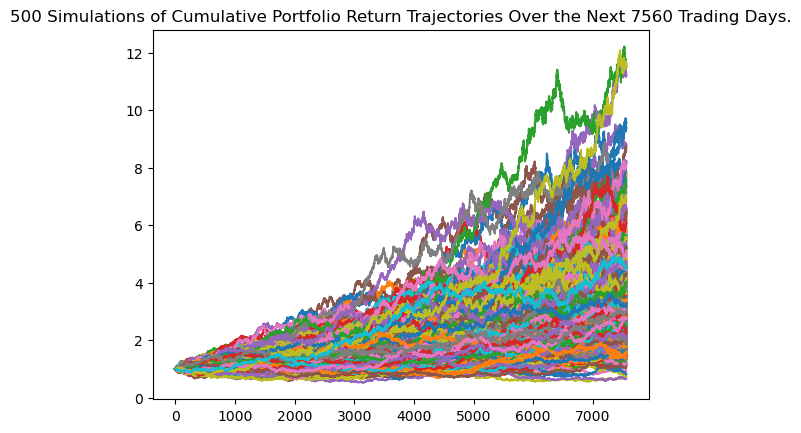

In [46]:
# Plot simulation outcomes title='500 Simulations of Cumulative Portfolio Returns Trajectories over the next {252*30} trading days'
line_plot = MC_30years.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_30_year", bbox_inches="tight")

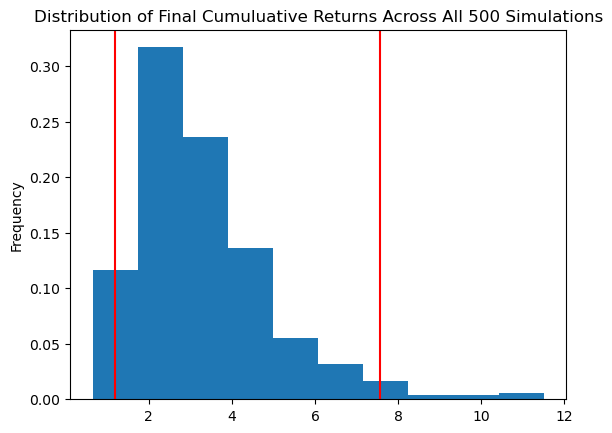

In [47]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_30years.plot_distribution()

# Save the plot for future usage
distribution_plot.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary = MC_30years.summarize_cumulative_return()

# Print summary statistics
print(MC_summary)

count           500.000000
mean              3.288857
std               1.651121
min               0.649791
25%               2.073028
50%               2.964595
75%               4.079456
max              11.505765
95% CI Lower      1.194500
95% CI Upper      7.560990
Name: 7560, dtype: float64


In [49]:
MC_summary[9]

7.56098971562945

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [59]:
# Set initial investment
initial_investment_30year = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000 
# SPY 60% and AGG 40% weight
ci_lower_thirty = round(MC_summary[8]*initial_investment_30year,2)
ci_upper_thirty = round(MC_summary[9]*initial_investment_30year,2)
# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment_30year} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty} and ${ci_upper_thirty}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $23890.01 and $151219.79


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [52]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_summary[8]*initial_investment,2)
ci_upper = round(MC_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $35835.01 and $226829.69


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [53]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

MC_5years = MCSimulation(
    portfolio_data = stock_data,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252*5
)
MC_5years

In [54]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001712,0.992820,0.992311,0.989859,1.011352,0.992864,1.001145,1.002821,1.008210,1.006348,...,1.004185,1.009521,1.001120,0.995476,1.011396,0.999852,0.999207,0.996439,0.999835,0.999278
2,1.004999,1.004246,0.992831,0.992518,1.010773,0.994648,0.998399,1.001378,1.010831,1.014338,...,0.999508,1.014866,0.995852,1.005440,1.010338,0.994872,1.006825,1.005681,1.006819,1.004397
3,1.000287,0.998166,0.993853,0.983907,1.009456,0.995149,1.003137,1.000625,1.009433,1.020201,...,1.010119,1.008027,0.998296,1.010197,1.006975,1.005822,1.011930,1.011636,1.008615,1.000306
4,1.000462,1.000827,0.994447,0.984237,0.997391,1.002083,1.008756,0.999609,1.010354,1.018605,...,1.012999,1.009514,0.996814,1.003391,1.010645,0.990673,1.020533,1.021063,1.010280,0.997150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.119330,1.223645,0.943451,1.148351,1.153895,1.402322,0.956811,1.769735,0.971387,1.040046,...,1.094722,1.104382,1.192063,1.410475,1.067227,1.212028,1.480628,1.411711,1.411222,1.553688
1257,1.110820,1.213864,0.938313,1.143433,1.160749,1.408894,0.952698,1.752348,0.970154,1.035585,...,1.103915,1.104634,1.188749,1.411261,1.070040,1.220680,1.485577,1.406477,1.407270,1.549750
1258,1.102269,1.215318,0.939774,1.150572,1.163547,1.416453,0.949596,1.752793,0.955610,1.026138,...,1.100698,1.108757,1.188006,1.408523,1.074176,1.226187,1.492596,1.398200,1.413939,1.549801
1259,1.101134,1.211857,0.940449,1.166166,1.165370,1.417872,0.949583,1.772353,0.952522,1.034276,...,1.101675,1.109860,1.189438,1.397836,1.073357,1.225148,1.493873,1.394641,1.405891,1.536671


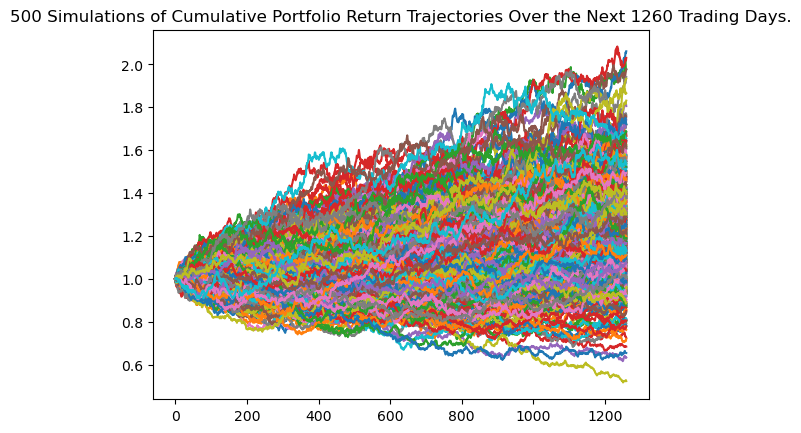

In [55]:
# Plot simulation outcomes
line_plot_5years = MC_5years.plot_simulation()

# Save the plot for future usage
line_plot_5years.get_figure().savefig("MC_5_year", bbox_inches="tight")

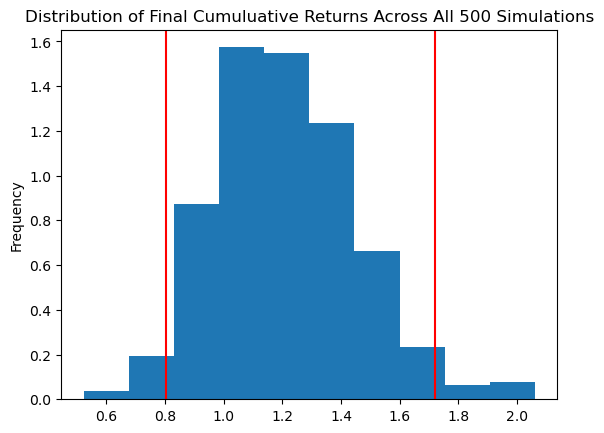

In [56]:
# Plot probability distribution and confidence intervals
distribution_plot_5years = MC_5years.plot_distribution()

# Save the plot for future usage
distribution_plot_5years.get_figure().savefig('MC_5year_dist_plot.png',bbox_inches='tight')

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary_5years = MC_5years.summarize_cumulative_return()

# Print summary statistics
print(MC_summary_5years)

count           500.000000
mean              1.211914
std               0.239273
min               0.523157
25%               1.038769
50%               1.192304
75%               1.360534
max               2.061083
95% CI Lower      0.804218
95% CI Upper      1.720495
Name: 1260, dtype: float64


In [58]:
# Set initial investment
initial_investment_5year = 20000 * 4

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_five = round(MC_summary_5years[8]*initial_investment_5year,2)
ci_upper_five = round(MC_summary_5years[9]*initial_investment_5year,2)


print(f"There is a 95% chance that an initial investment of ${initial_investment_5year} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $80000 in the portfolio over the next 5 years will end within in the range of $64337.47 and $137639.63


### Ten Years Retirement Option

In [60]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# SPY 60% and AGG 40% weight
num_sims = 500

MC_10years = MCSimulation(
    portfolio_data = stock_data,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252*10
)
MC_10years

In [61]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999216,1.002183,0.993209,1.007657,1.006129,0.997739,0.999399,1.004275,1.001687,0.997914,...,0.993796,1.004685,0.997647,1.005282,1.001281,1.007608,0.997556,1.005064,0.997748,0.998650
2,1.002970,1.005623,0.997794,1.001208,0.994845,1.003848,0.997997,1.002130,0.998215,0.999109,...,0.997420,1.014295,1.000599,1.003730,1.006578,1.010287,0.999986,1.012025,1.003201,1.000239
3,1.019150,1.003581,0.990718,0.997650,0.998263,1.006353,0.994778,1.003058,0.993121,0.989781,...,1.001092,1.003235,1.005802,0.991540,1.004792,1.016648,1.001132,1.015770,0.998271,1.005996
4,1.014459,1.012735,0.991560,1.007078,1.008955,1.003494,1.005965,1.006674,0.998129,0.984856,...,0.995442,1.010568,1.008015,0.995274,1.013599,1.020301,1.003315,1.016348,0.993522,1.010565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.668661,1.726046,0.667937,2.504919,1.671961,1.149170,1.368410,1.523881,1.184025,0.875038,...,1.979761,1.793815,1.496241,1.567519,1.047259,0.727229,1.566287,1.610816,1.968660,1.419940
2517,2.648191,1.712052,0.670175,2.525951,1.662957,1.144492,1.361674,1.537765,1.189589,0.883170,...,1.992475,1.781957,1.493236,1.559490,1.049618,0.729498,1.559798,1.613134,1.961859,1.425333
2518,2.647486,1.741395,0.671778,2.535350,1.679917,1.141991,1.368491,1.523746,1.191548,0.873386,...,1.995230,1.785629,1.489398,1.558168,1.049542,0.727556,1.559321,1.618020,1.969372,1.424841
2519,2.628560,1.740107,0.670336,2.517581,1.677065,1.132920,1.371598,1.528466,1.199673,0.868327,...,2.010950,1.788668,1.486095,1.543355,1.035848,0.723375,1.566107,1.613205,1.981168,1.416893


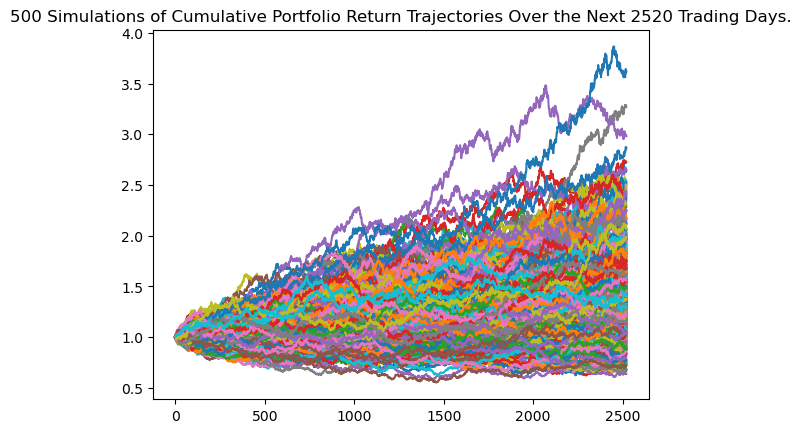

In [62]:
# Plot simulation outcomes
line_plot_10years = MC_10years.plot_simulation()

# Save the plot for future usage
line_plot_10years.get_figure().savefig("MC_10_year", bbox_inches="tight")

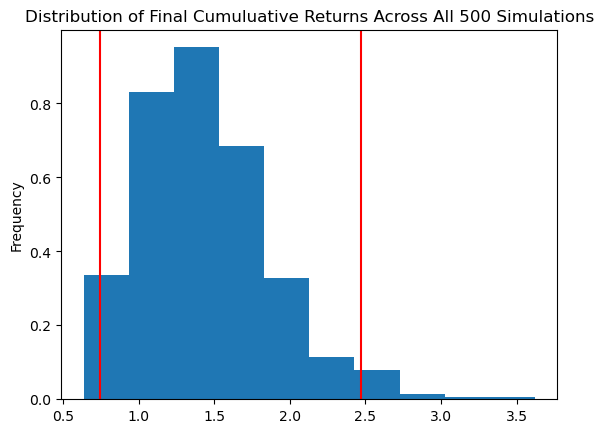

In [64]:
# Plot probability distribution and confidence intervals
distribution_plot_10years = MC_10years.plot_distribution()

# Save the plot for future usage
distribution_plot_10years.get_figure().savefig('MC_10year_dist_plot.png',bbox_inches='tight')

In [65]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary_10years = MC_10years.summarize_cumulative_return()

# Print summary statistics
print(MC_summary_10years)

count           500.000000
mean              1.445581
std               0.437038
min               0.637490
25%               1.144831
50%               1.388554
75%               1.693052
max               3.620754
95% CI Lower      0.741989
95% CI Upper      2.471470
Name: 2520, dtype: float64


In [69]:
# Set initial investment
initial_investment_10year = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_summary_10years[8]*initial_investment_10year,2)
ci_upper_ten = round(MC_summary_10years[9]*initial_investment_10year,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10year} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $44519.31 and $148288.18


In [70]:
average_10year = round((ci_lower_ten+ci_upper_ten)/2,2)
average_10year

96403.74

In [71]:
average_5year= round((ci_lower_five+ci_upper_five)/2,2)
average_5year

100988.55

In [72]:
average_30year = round((ci_lower_thirty+ci_upper_thirty)/2,2)
average_30year

87554.9

In [73]:
annual_return_30 = ((average_30year - initial_investment_30year) / 30)
annual_percent_30 = annual_return_30 / initial_investment_30year
annual_return_10 = ((average_10year - initial_investment_10year) / 10)
annual_percent_10 = annual_return_10 / initial_investment_10year
annual_return_5 = ((average_5year - initial_investment_5year) / 5)
annual_percent_5 = annual_return_5 / initial_investment_5year




print(f"Annual Percent Change (30 years): {annual_percent_30*100:.2f}%")
print(f"Annual Percent Change (10 years): {annual_percent_10*100:.2f}%")
print(f"Annual Percent Change (5 years): {annual_percent_5*100:.2f}%")

Annual Percent Change (30 years): 11.26%
Annual Percent Change (10 years): 6.07%
Annual Percent Change (5 years): 5.25%


In [ ]:
# Summary: 30 year investments has best outcome on average, based on annualized percentage return on initial investment.